In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

#### `Distribution of Amir's sales`
Since each deal Amir worked on (both won and lost) was different, each was worth a different __amount__ of money. These values are stored in the amount column of __amir_deals__ As part of Amir's performance review, you want to be able to estimate the probability of him selling different amounts, but before you can do this, you'll need to determine what kind of distribution the __amount__ variable follows.

Both __pandas__ as __pd__ and __matplotlib.pyplot__ as __plt__ are loaded and __amir_deals__ is available.

In [3]:
amir_deals = pd.read_excel('../../datasets/amir_deals.xlsx')
amir_deals.head()

,Unnamed: 0,product,client,status,amount,num_users
0,1,Product F,Current,Won,7389.52,19
1,2,Product C,New,Won,4493.01,43
2,3,Product B,New,Won,5738.09,87
3,4,Product I,Current,Won,2591.24,83
4,5,Product E,Current,Won,6622.97,17


- Create a histogram with 10 bins to visualize the distribution of the __amount__. Show the plot.

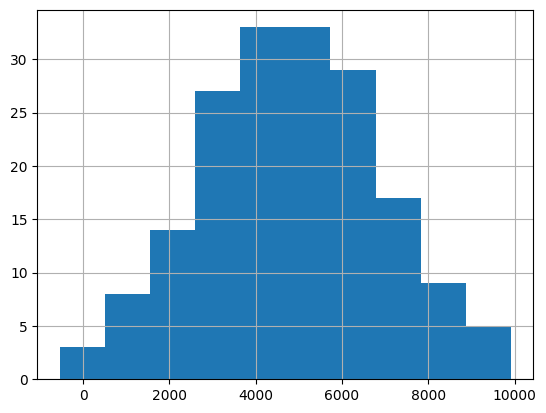

In [4]:
# Histogram of amount with 10 bins and show plot
# plt.hist(amir_deals['amount'], bins=10)
amir_deals['amount'].hist(bins=10)
plt.show()

#### `Question`
Which probability distribution do the sales amounts most closely follow?

#### Possible answers
- Uniform
- Binomial
- `Normal` Now that you've visualized the data, you know that you can approximate probabilities of different amounts using the normal distribution.
- None of the above

#### `Probabilities from the normal distribution`
Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the __amount__ column of __amir_deals__ and follow a normal distribution with a mean of 5000 dollars and a standard deviation of 2000 dollars. As part of his performance metrics, you want to calculate the probability of Amir closing a deal worth various amounts.

__norm__ from __scipy.stats__ is imported as well as __pandas__ as __pd__. The DataFrame __amir_deals__ is loaded.

- What's the probability of Amir closing a deal worth less than $7500?

In [5]:
# Estimate parameters of normal distribution
mean_amount = amir_deals['amount'].mean()
mean_amount

4812.000337078652

In [6]:
# Estimate parameters of normal distribution
std_amount = amir_deals['amount'].std()
std_amount

2058.1732253555597

In [7]:
# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000, 2000)

print(prob_less_7500)

0.8943502263331446


- What's the probability of Amir closing a deal worth more than $1000?

In [8]:
# Probability of deal > 1000
prob_over_1000 = norm.cdf(5000, 1000, 2000)

print(prob_over_1000)

0.9772498680518208


- What's the probability of Amir closing a deal worth between $3000 and $7000?

In [9]:
# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(300, 5000, 2000)

print(prob_3000_to_7000)

0.8319580405337044


- What amount will 25% of Amir's sales be less than?

In [10]:
# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25, 5000, 2000)

print(pct_25)

3651.0204996078364


#### `Simulating sales under new market conditions`
The company's financial analyst is predicting that next quarter, the worth of each sale will increase by 20% and the volatility, or standard deviation, of each sale's worth will increase by 30%. To see what Amir's sales might look like next quarter under these new market conditions, you'll simulate new sales amounts using the normal distribution and store these in the __new_sales__ DataFrame, which has already been created for you.

In addition, __norm__ from __scipy.stats__, __pandas__ as __pd__, and __matplotlib.pyplot__ as __plt__ are loaded.

- Currently, Amir's average sale amount is $5000. Calculate what his new average amount will be if it increases by 20% and store this in __new_mean__.
- Amir's current standard deviation is $2000. Calculate what his new standard deviation will be if it increases by 30% and store this in __new_sd__.
- Create a variable called __new_sales__, which contains 36 simulated amounts from a normal distribution with a mean of __new_mean__ and a standard deviation of __new_sd__.
- Plot the distribution of the new_sales amounts using a histogram and show the plot.

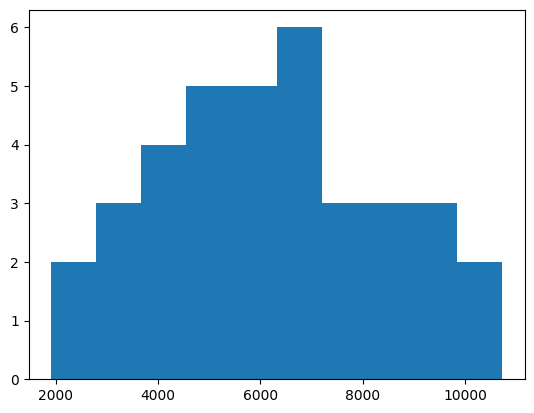

In [11]:
# Calculate new average amount
new_mean = 5000 * 1.20

# Calculate new standard deviation
new_sd = 2000 * 1.30

# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, 36)

# Create histogram and show
plt.hist(new_sales)
plt.show()

#### `Which market is better?`
The key metric that the company uses to evaluate salespeople is the percent of sales they make over $1000 since the time put into each sale is usually worth a bit more than that, so the higher this metric, the better the salesperson is performing.

Recall that Amir's current sales amounts have a mean of $5000 and a standard deviation of $2000, and Amir's predicted amounts in next quarter's market have a mean of $6000 and a standard deviation of $2600.

__norm__ from __scipy.stats__ is imported.

Based __only__ on the metric of __percent of sales over $1000__, does Amir perform better in the current market or the predicted market?

- Amir performs much better in the current market.
- Amir performs much better in next quarter's predicted market.
- `Amir performs about equally in both markets`. Amir performs about equally in both markets. berikut penjelasan dari websitenya
In the current market, Amir makes sales over $1000 about 97.7% of the time, and about 97.3% of the time in the predicted market, so there's not much of a difference. However, his average sale amount is higher in the predicted market, so your company may want to consider other metrics as well

#### `Visualizing sampling distributions`
On the right, try creating sampling distributions of different summary statistics from samples of different distributions. Which distribution does the central limit theorem not apply to?

- Discrete uniform distribution
- Continuous uniform distribution
- Binomial distribution
- All of the above
- `None of the above` Regardless of the shape of the distribution you're taking sample means from, the central limit theorem will apply if the sampling distribution contains enough sample means.

#### `The CLT in action`
The central limit theorem states that a sampling distribution of a sample statistic approaches the normal distribution as you take more samples, no matter the original distribution being sampled from.

In this exercise, you'll focus on the sample mean and see the central limit theorem in action while examining the __num_users__ column of __amir_deals__ more closely, which contains the number of people who intend to use the product Amir is selling.

__pandas__ as __pd__, __numpy__ as __np__, and __matplotlib.pyplot__ as __plt__ are loaded and __amir_deals__ is available.

- Create a __histogram__ of the __num_users__ column of __amir_deals__ and show the plot.

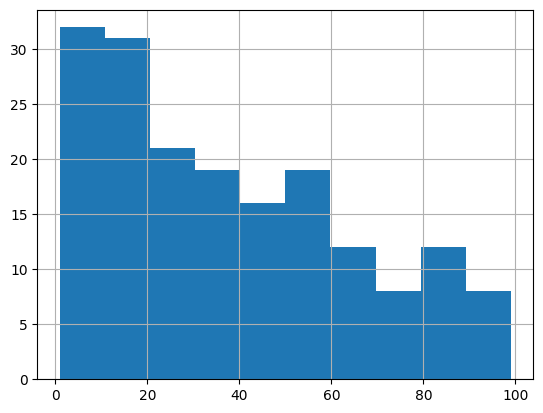

In [12]:
# Create a histogram of num_users and show
amir_deals['num_users'].hist()
plt.show()

- Set the __seed__ to ___104___.
- Take a sample of size ___20___ with replacement from the __num_users__ column of __amir_deals__, and take the __mean__.

In [13]:
# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals
samp_20 = amir_deals['num_users'].sample(20, replace=True)

# Take mean of samp_20
print(samp_20.mean())

32.0


- Repeat this ___100___ times using a __for__ loop and store as __sample_means__. This will take ___100___ different samples and calculate the mean of each.

In [14]:
# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals and take mean
samp_20 = amir_deals['num_users'].sample(20, replace=True)
np.mean(samp_20)

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
print(sample_means)

[31.35, 45.05, 33.55, 38.15, 50.85, 31.85, 34.65, 36.25, 38.9, 44.05, 35.45, 37.6, 37.95, 28.85, 33.3, 31.65, 45.5, 43.2, 24.4, 41.05, 37.2, 39.3, 29.45, 33.55, 45.3, 45.1, 30.95, 36.25, 37.65, 42.55, 34.55, 41.1, 36.9, 42.45, 38.45, 45.9, 42.7, 38.4, 32.55, 30.25, 38.0, 38.75, 49.3, 39.55, 49.05, 42.05, 41.0, 40.6, 58.25, 34.55, 51.2, 34.15, 36.95, 42.45, 41.85, 33.2, 36.15, 37.55, 34.2, 29.75, 42.35, 43.75, 29.0, 32.05, 31.65, 44.6, 30.85, 29.6, 37.7, 33.1, 36.35, 40.65, 45.7, 33.8, 40.1, 39.9, 33.5, 32.65, 32.85, 42.85, 35.4, 31.7, 32.0, 33.85, 36.6, 44.35, 39.9, 37.0, 37.3, 42.5, 38.35, 42.8, 44.55, 30.3, 50.45, 42.35, 40.65, 29.85, 39.3, 33.1]


- Convert __sample_means__ into a __pd.Series__, create a histogram of the __sample_means__, and show the plot.

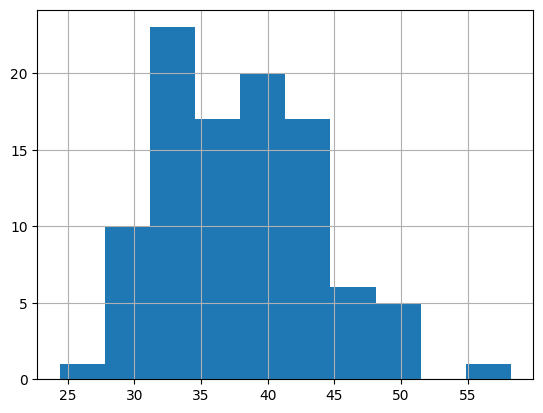

In [15]:
# Set seed to 104
np.random.seed(104)

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

#### `The mean of means`
You want to know what the average number of users (num_users) is per deal, but you want to know this number for the entire company so that you can see if Amir's deals have more or fewer users than the company's average deal. The problem is that over the past year, the company has worked on more than ten thousand deals, so it's not realistic to compile all the data. Instead, you'll estimate the mean by taking several random samples of deals, since this is much easier than collecting data from everyone in the company.

__amir_deals__ is available and the user data for all the company's deals is available in __all_deals__. Both __pandas__ as __pd__ and __numpy__ as __np__ are loaded.

- Set the random __seed__ to ___321___.
- Take ___30___ samples (with replacement) of size ___20___ from __all_deals['num_users']__ and - take the mean of each sample. Store the sample means in __sample_means__.
- Print the mean of __sample_means__.
- Print the mean of the __num_users__ column of __amir_deals__.

In [16]:
all_deals = pd.read_excel('../../datasets/all_deals.xlsx')
all_deals.head()

,Unnamed: 0,product,num_users
0,1,3544,19
1,2,5073,43
2,3,6149,87
3,4,7863,83
4,5,14,17


In [20]:
# Set seed to 321
np.random.seed(321)

sample_means = []
# Loop 30 times to take 30 means
for i in range(30):
  # Take sample of size 20 from num_users col of all_deals with replacement
  cur_sample = all_deals['num_users'].sample(20, replace=True)
  # Take mean of cur_sample
  cur_mean = cur_sample.mean()
  # Append cur_mean to sample_means
  sample_means.append(cur_mean)

# Print mean of sample_means
print(np.mean(sample_means))

# Print mean of num_users in amir_deals
print(amir_deals['num_users'].mean())

38.31333333333332
37.651685393258425


#### `Identifying lambda`
Now that you've learned about the Poisson distribution, you know that its shape is described by a value called lambda. In this exercise, you'll match histograms to lambda values.

- Match each Poisson distribution to its lambda value.
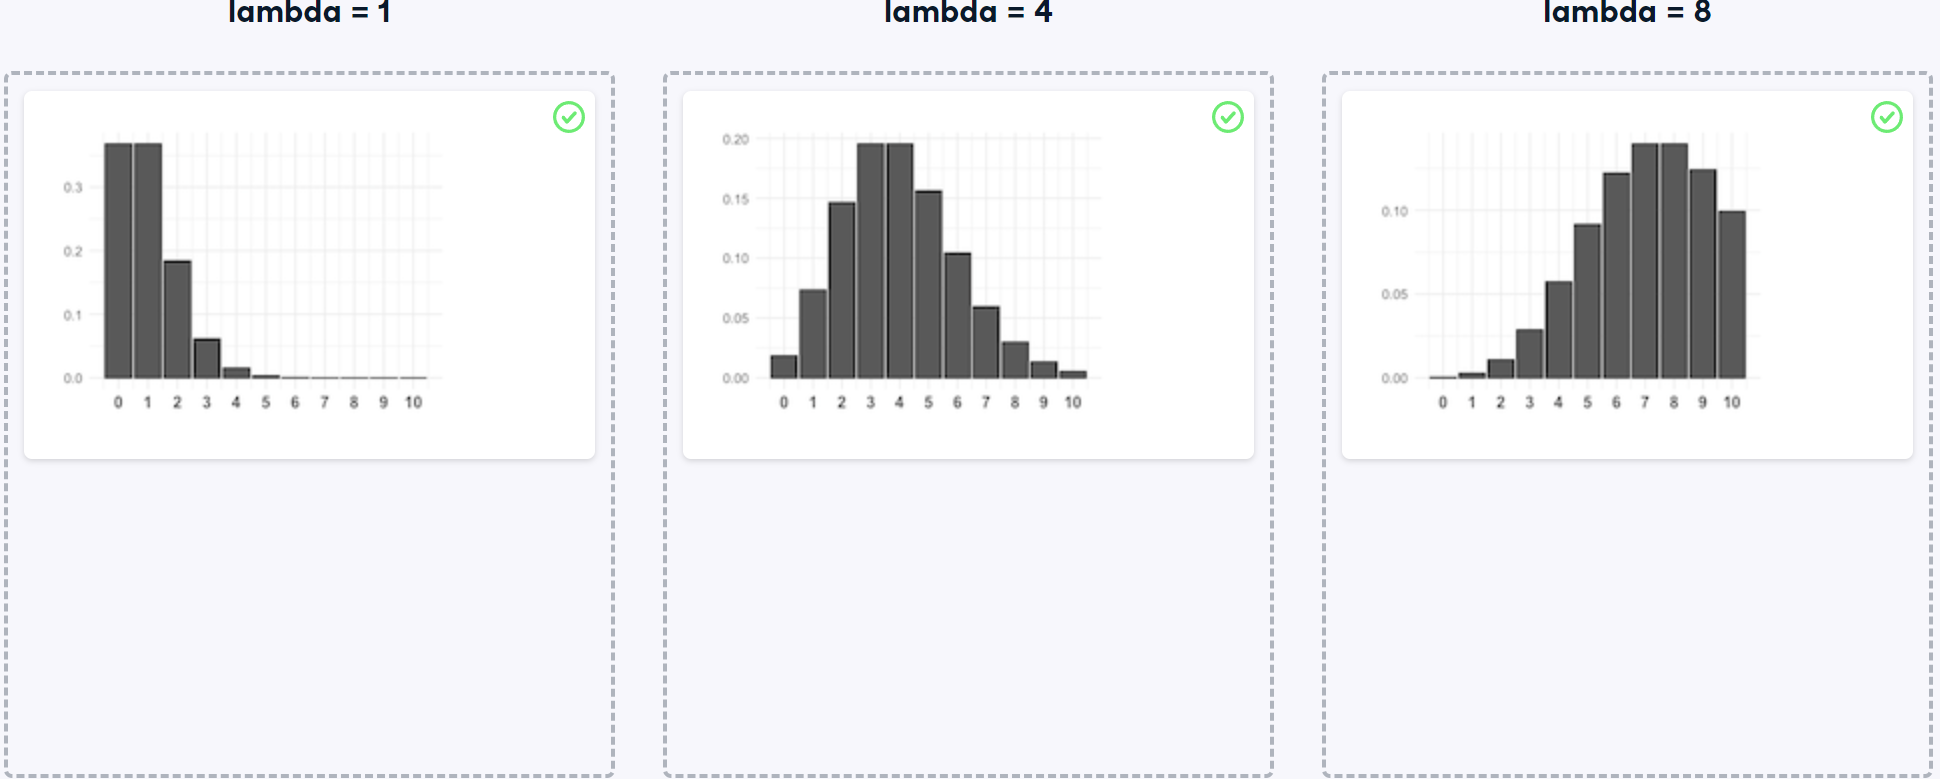

#### `Tracking lead responses`
Your company uses sales software to keep track of new sales leads. It organizes them into a queue so that anyone can follow up on one when they have a bit of free time. Since the number of lead responses is a countable outcome over a period of time, this scenario corresponds to a Poisson distribution. On average, Amir responds to 4 leads each day. In this exercise, you'll calculate probabilities of Amir responding to different numbers of leads.

- Import __poisson__ from __scipy.stats__ and calculate the probability that Amir responds to ___5___ leads in a day, given that he responds to an average of ___4___.

In [23]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 5 responses
prob_5 = poisson.pmf(5, 4)

print(prob_5)

0.1562934518505317


- Amir's coworker responds to an average of ___5.5___ leads per day. What is the probability that she answers ___5___ leads in a day?

In [25]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 5 responses
prob_coworker = poisson.pmf(5, 5.5)

print(prob_coworker)

0.17140068409793663


- What's the probability that Amir responds to ___2___ or fewer leads in a day?

In [26]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2, 4)

print(prob_2_or_less)

0.23810330555354436


- What's the probability that Amir responds to more than ___10___ leads in a day?

In [28]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of > 10 responses
prob_over_10 = 1 - poisson.cdf(10, 4)

print(prob_over_10)

0.0028397661205137315


#### `Distribution dragging and dropping`
By this point, you've learned about so many different probability distributions that it can be difficult to remember which is which. In this exercise, you'll practice distinguishing between distributions and identifying the distribution that best matches different scenarios.

Match each situation to the distribution that best models it.
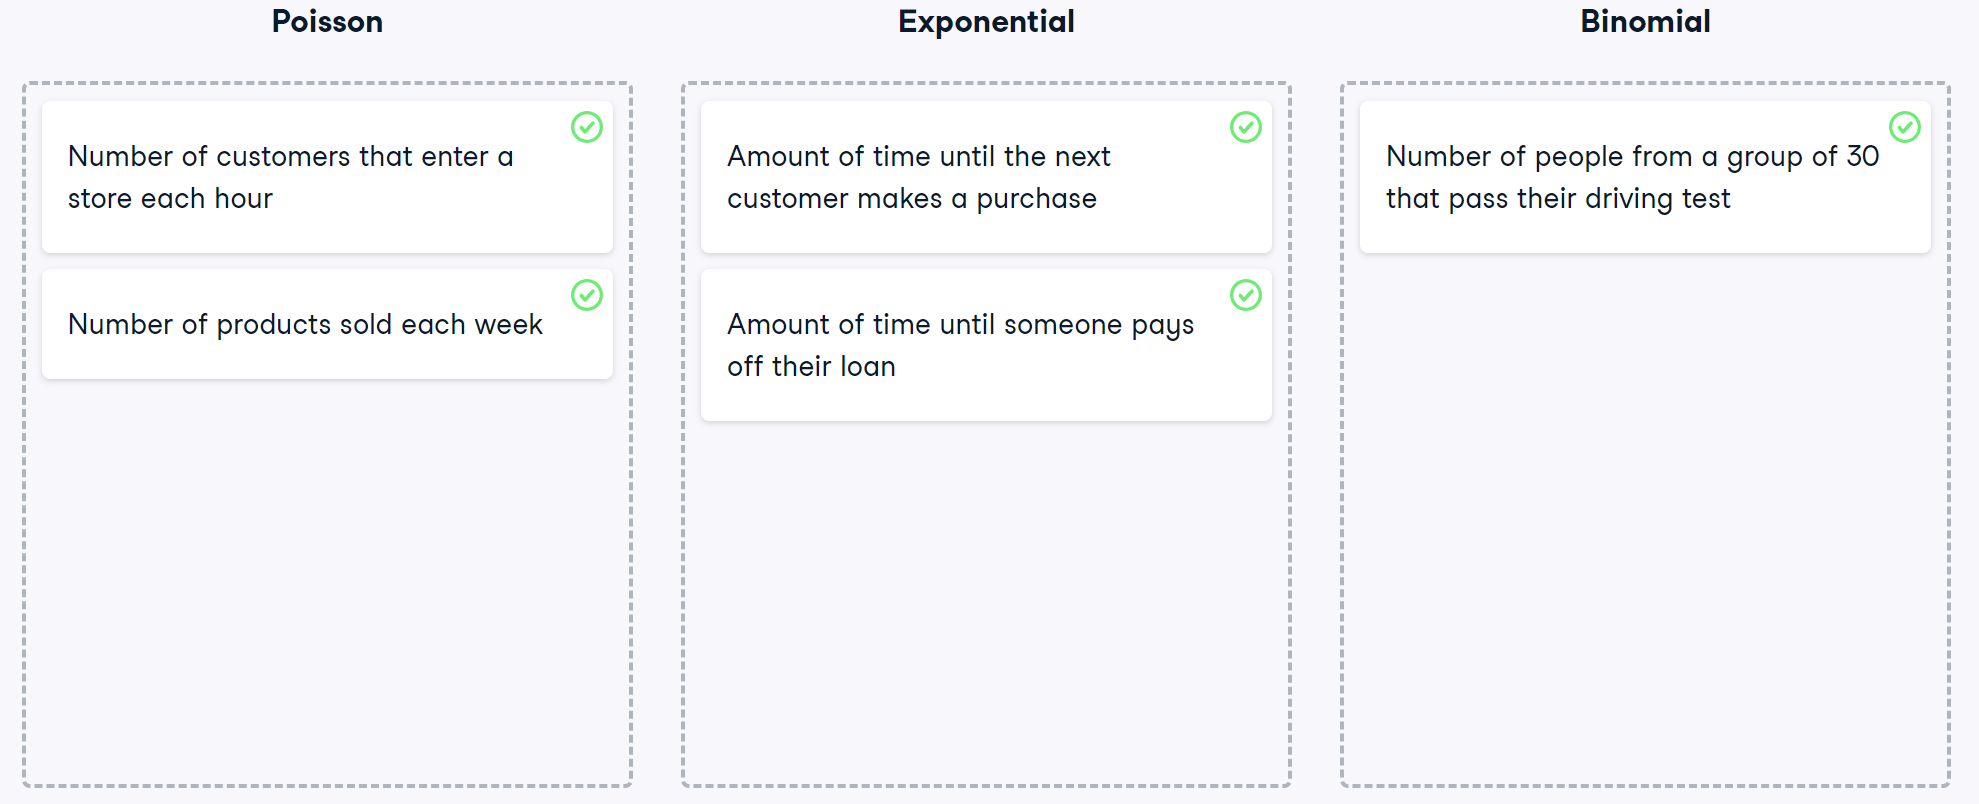

#### `Modeling time between leads`
To further evaluate Amir's performance, you want to know how much time it takes him to respond to a lead after he opens it. On average, he responds to 1 request every 2.5 hours. In this exercise, you'll calculate probabilities of different amounts of time passing between Amir receiving a lead and sending a response.

- Import __expon__ from __scipy.stats.__ What's the probability it takes Amir less than an hour to respond to a lead?

In [31]:
# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes < 1 hour
print(expon.cdf(1, scale=2.5))

0.3296799539643607


- What's the probability it takes Amir more than ___4___ hours to respond to a lead?

In [32]:
# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes > 4 hours
print(1 - expon.cdf(4, scale=2.5))

0.20189651799465536


- What's the probability it takes Amir ___3-4___ hours to respond to a lead?

In [34]:
# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes 3-4 hours
print(expon.cdf(4, scale=2.5) - expon.cdf(3, scale=2.5))

0.09929769391754684


#### `The t-distribution`
Which statement is not true regarding the t-distribution?

#### Possible Answers
`Select one answer`

- The t-distribution has thicker tails than the normal distribution.

- A t-distribution with high degrees of freedom resembles the normal distribution.

- The number of degrees of freedom affects the distribution's variance.

- `The t-distribution is skewed.`